# Reinforcement Learning

By Hao Dong

The **agent** and **enviroment**

The environment is an entity that the agent can interact with, e.g. Pong game.

The agent controls the paddle to hit the ball back and forth. An agent can “interact” with the environment by using a predefined **action set**: $A = \{A_1, A_2, ... \}$ (all possible actions)

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>
<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">
<p>The goal of reinforcement learning algorithms is to teach the agent how to interact “well” with the environment so that the agent is able to obtain a good score under a predefined evaluation metric</p>
</div>

The agent receive a reward $r$ of $1$ when the ball hits the wall on the opposite side. 

At an arbitrary time step (a point at which observations can be made), $t$, the agent first observes the current state of the environment, $S_t$, and the corresponding reward value, $R_t$.

The agent then decides what to do next based on the state and reward information. The action the agent intends to perform, $A_t$, gets fed back into the environment such that we can obtain the new state $S_{t+1}$ and reward $R_{t+1}$.

$$(S_t,R_t) \rightarrow A_t \rightarrow (S_{t+1},R_{t+1})$$

The observation of the environment state $s$($s$ is a general representation of state regardless of time step $t$) from the agent’s perspective does not always contain all the information about the environment. 

If the observation only contains partial state information, the environment is *partially observable*. Nevertheless, if the observation contains the complete state information of the environment, the environment is *fully observable*.

The action $a$ ($a$ is a general representation of action regardless of time step $t$) is usually conditioned on the state $s$ to represent the behavior of the agent (Under assumption of fully observable environments.)

To provide feedback from the environment to the agent, a reward function $R$ generates an immediate reward $R_t$ according to the environment status and sends it to the agent at every time step. $R_t=R(S_t)$.

> Trajectory: 
> 
> A **trajectory** is defined: 
> 
> $\tau = (S_0, R_0,  A_0, S_1, R_1, A_1,...)$
> 
> A *trajectory*, being referred to also as an *episode*, is a sequence that goes from the initial state to the terminal state (for finite cases)

The initial state in a trajectory, $S_0$, is randomly sampled from the *start-state distribution*, denoted by $ρ_0$, in which:

$$S_0 \sim ρ_0(.)$$

The transition from a state (after taking an action) to the next state can be either *deterministic transition process* or *stochastic transition process*

For the *deterministic transition*, the next state $S_{t+1}$ is governed by a deterministic function:

$$S_{t+1} = f(S_t, A_t)$$

For the *stochastic transition* process, the next state $S_{t+1}$ is described as a probabilistic distribution:

$$S_{t+1} \sim p(S_{t+1}|S_t, A_t)$$

**Exploitation** means maximizing the agent performance using the existing knowledge, and its performance is usually evaluated by the expected reward. Given the actual knowledge, the agent doesn't take risk to explore.

The policy he took here is the **greedy policy**, which means the agent constantly performs the action that yields the highest expected reward based on current information, rather than taking risky trials which may lead to lower expected rewards.

**Exploration** means increasing existing knowledge by taking actions and interacting with the environment.

### Markov Decision Process

A Markov process (MP) is a *discrete stochastic process* with *Markov property*.

<center>
<img src="assets/markov-process-example.png" height=360>
</center>

This graph simulates how a person works on two tasks and goes to bed in the end.

If I'm doing the "Task 1" and exists the `30%` probability of stoping and go to play a "Game" and then, the probability of returning to do the "Task 1" is only `10%` and the probability of keep playing is `90%`.

Graphical Model of a Markov Process
<center>
<img src="assets/graphical-model-mp.png" height=80> </center>

$a \rightarrow b$ indicates the variable $b$ is depended on a vaiable $a$

The probabilistic graphical model can help us to have a more intuitive sense of the relationships between variables in reinforcement learning, as well as providing rigorous references when we derive the gradients with respect to different variables along the MP chains

MP follows the assumption of **Markov chain** (*memoryless property*) where the next state $S_{t+1}$
is only dependent on the current state $S_t$, with the probability of a state
jumping to the next state described as follows:

$$P(S_{t+1}|S_{t}) = P(S_{t+1}|S_0, ..., S_{t})$$

Also the *time homogeneus property*

$$P(S_{t+1}|S_{t}) = P(S_{t+2}|S_{t+1})$$

Given a finite *state set* $S$, we can have *state transition matrix* $P$

$ Ｓ= \{g, t_1, t_2, r, p, b\}$



<center>
<img src="assets/matrix-transition.PNG" height=170>
</center>

Where $P_{i,j}$ represents the probability of transferring the current state $S_i$ to the next state $S_j$.

$$ P(s=t_1|s=g)=10\%$$

The sum of each row must be equal to $1$ and the $P$ is always a square matrix.

A Markov Process can be represented by a tuple $<Ｓ, P>$

The next state is sample from $P$:

$$S_{t+1} \sim P_{S_t} $$

For continuous case a finite matrix can not be used to represent the transition

#### Markov Reward Process

We need to add feedback from the enviroment to the agent, so we extent

$<Ｓ, P>$ to $<Ｓ, P, R, \gamma>$, in which $R$ represent the *reward function* and $\gamma$ *reward discount factor*.

$$R_t = R(S_t)$$

So the Graphical Model of a Markov Process is updated to 
<center>
<img src="assets/graphical-model-mp-reward.png" height=170>
</center>

But, if we are considering to move to the next state, we should take account the rewards of the following next states that we will take in order to reach the $T$.

If a single trajectory $\tau$ has $T$ time steps, then **the return** is the cummulative reward discounted by $\gamma \in (0,1)$  of a trajectory.

$$G_{t=0:T} = G_{t=0}^{(T)} = R(\tau)_{t=0}^{(T)} = R_0 + \gamma R_1 + ... + \gamma^{T} R_T$$

where $R_t$ is the **immediate reward** at time step $t$, and $T$ represents the time step of the terminal state and $r$ as a general representation of immediate reward value.

The discounted factor is especially critical when handling with infinite MRP cases

The value function $V(s)$ represents the expected return from the state $S_0$ that take the state value $s$ until final state.

<!-- $$V(s) = E[R_t|S_0=s]$$ -->
$$V(s) = E[G_{t=0}^{(T)}|S_0=s]$$

A simple way to estimate the $V(s)$ is Monte Carlo method, we can randomly sample a large number of trajectories starting from state $s$ according to the given state transition matrix $P$.

If the agent acts according to the policy $π$, we denote the *value function* as $V^π(s)$


<!-- tasks = ['Bed', 'Game', 'Pass', 'Rest', 'Task1', 'Task2']
rewards = {'Bed':0, 'Game':-1, 'Pass':10, 'Rest':1, 'Task1':-2, 'Task2':-2}

transition = np.array(
    [
        [1.0, 0.0, 1.0, 0.0, 0.0, 0.3],
        [0.0, 0.9, 0.0, 0.0, 0.3, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.6],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.1],
        [0.0, 0.1, 0.0, 0.1, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.9, 0.7, 0.0]
    ]
)



for tk in  tasks:
    n_iter = 1
    print("V(S={})=".format(tk), end='')
    while n_iter<=10_000:    
        array = []
        task = tk
        target = 'Bed'
        G = 0
        gamma = 0.9
        t = 0
        while True:
            idx = tasks.index(task)
            reward = rewards[task]
            G = G + (gamma** t)*reward
            t+=1
            prob = transition[:, idx].copy()
            task = np.random.choice(tasks, p=prob)
            if task == target:
                array.append(G)
                n_iter+=1
                break

    print("{:.3f}".format(sum(array)/len(array)))} -->

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [179]:
gamma = 0.9
tasks = ['Bed', 'Game', 'Pass', 'Rest', 'Task1', 'Task2']
rewards = {'Bed':0, 'Game':-1, 'Pass':10, 'Rest':1, 'Task1':-2, 'Task2':-2}
value_function = {'Bed':0, 'Game':0, 'Pass':0, 'Rest':0, 'Task1':0, 'Task2':0}

transition = np.array(
    [
        [1.0, 0.0, 1.0, 0.0, 0.0, 0.3],
        [0.0, 0.9, 0.0, 0.0, 0.3, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.6],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.1],
        [0.0, 0.1, 0.0, 0.1, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.9, 0.7, 0.0]
    ]
)

In [180]:
def get_trajectory(task:str, target:str):
    def trajectory(task:str, target:str, data:list):
        data.append(task)
        if task == target:
            return data
        else:
            idx = tasks.index(task)
            next_task =np.random.choice(tasks, p=transition[:, idx])
            return trajectory(next_task, target, data)

    return trajectory(task, target, [])

In [ ]:
for task in tasks:
    n_iter = 10_000
    v = 0
    while n_iter > 0:
        # 1. Simulating trajectory
        simulated_trajectory = get_trajectory(task, 'Bed')

        # 2. Simulating rewards
        simulated_rewards = np.array([rewards[x] for x in simulated_trajectory])

        # 3. Computing return
        calculated_return = np.sum(
            np.cumprod(
                np.ones_like(simulated_rewards)*gamma)/gamma *simulated_rewards)
        v = v + calculated_return
        n_iter -= 1
    n_iter = 10_000
    value_function[task] = v/n_iter

In [191]:
value_function

{'Bed': 0.0,
 'Game': -5.922879947584755,
 'Pass': 10.0,
 'Rest': 3.9446244226534253,
 'Task1': -1.199615908058622,
 'Task2': 3.7855726236614347}

The agent policy usually selects the next state with higher value.

E.g. if we are in the *Game* state, we only have, two options: *Game* or *Task1*, we should choice *Task1* (since the higher value of $V(S=\text{Task1})$). And if we are in th *Task1* state, we would have two options: *Game* or *Task2*.  We should choice *Task2* (since the higher value of $V(S=\text{Task2})$) and so on.

$$\text{Game} \rightarrow \text{Task1} \rightarrow \text{Task2} \rightarrow \text{Pass} \rightarrow \text{Bed}$$

#### Markov Decision Process

The actions taken above only depend on the expected value of discounted reward  given a state. The action that maximize this expected value is taken. 

But we do more granularity this expected value and compute at level of action

In the tuple $$< Ｓ, P, R, \gamma>$$ we add $Ａ$

$$< Ｓ, Ａ, P, R, \gamma>$$

$$ P(s'|s,a) = P(S_{t+1} = s'|S_{t}=s, A_t=a)$$

Where $Ａ$ represent *finite action set* $\{a_1, a_2, a_3, ...\}$ and the immediate reward becomes:

$$R_t = R(S_t, A_t)$$

A *policy* $\pi$ represents the way in which the agent behaves based on its observations of the enviroment.

$$\pi(a|s) = p(A_t=a|S_t = s)$$

**Expected return** is the expectation of returns over all possible trajectories under a policy. Therefore, **the goal of reinforcement learning is to find the higher expected return by optimizing the policy**.

The probability of the T-step trajectory for MDP is:
Based on a behavior of the agent will generate a path or trajectory.

$$p(\tau|\pi)_{t=0}^{T-1} = p_0(S_0) \prod_{t=0}^{T-1} p(S_{t+1}|S_t, A_t)\pi(A_t|S_t)$$

We are omitting initial state $S_0$. So the probability of the T-step trajectory for MDP is:

$$p(\tau|\pi)_{t=0}^{T-1} = \prod_{t=0}^{T-1} p(S_{t+1}|S_t, A_t)\pi(A_t|S_t)$$

Given the reward function $R$ and all possible trajectories $τ$, the expected
return $J(π)$ starting from state $t=0$ is defined as follows

$$J(\pi) = \sum_{\tau} P(\tau|\pi)_{t=0}^{T-1} R(\tau)_{t=0}^{T} = E_{\tau \sim \pi}[R(\tau)_{t=0}^{T}]$$

The RL optimization problem is to improve the policy for maximizing the expected return with optimization methods. 

The **optimal policy** $π^∗$ can be expressed as

$$\pi^* = \argmax_{\pi} J(\pi)$$

Given policy $\pi$, the **value function** $V(s)$ can be defined as:

$$V^{\pi} (s) = E_{\tau \sim \pi}[R(\tau)_{t=0}^{T}|S_{t}=s]$$

where $τ ∼ π$ means the trajectories $τ$ are sampled given the policy $π$

In MDP, given an action, we have the **action-value function**, which
depends on both the state and the action just taken

$$Q^{\pi} (s, a) = E_{\tau \sim \pi}[R(\tau)_{t=0}^{T}|S_{t}=s, A_{t}=a]$$

We need to keep in mind that the $Q^π(s, a)$ depends on $π$, as the
estimation of the value is an expectation over the trajectories by the policy
$π$. This also indicates if the $π$ changes, the corresponding $Q^π(s, a)$ will also change.

We therefore usually call the value function estimated with a specific policy *the on-policy value function* (with lower case $q$), for the distinction from
the optimal value function estimated with the optimal policy.

$$q_{\pi}(s,a) = E_{\tau \sim \pi}[R(\tau)_{t=0}^{T}|S_t=s, A_t=a]$$

$$v_{\pi}(s) = E_{a \sim \pi}[q_{\pi}(s,a)] $$

$$v_{\pi}(s) = \sum_{a} \pi(a|s)  q_{\pi}(s,a) $$
<!-- =E_{\tau \sim \pi}[R(\tau)|S_0=s] -->

We can use *Monte Carlo method* to estimate

Bellman Equation for **Value Function**

Given state $s$ in time step $t=0$ ($s'$ in time step $t=1$) with a policy $\pi$, and the all trajectories $\tau$ upto time step $T$ with respective rewards, we can define  the value function  $v^{\pi} (s)$

$$v^{\pi} (s) = E_{\tau \sim \pi}[R(\tau)_{t=0}^{T}|S_{t}=s] = \sum_{\tau} P(\tau|\pi)_{t=0}^{T-1} R(\tau)_{t=0}^{T} $$



We can split the above into 
1.  $P(\tau|\pi)_{t=1}^{T-1} =  P(s'|s,a) \pi(a|s) P(\tau|\pi)_{t=1}^{T-1}$

2. $R(\tau)_{t=0}^{T} = R_0 + \gamma R(\tau)_{t=1}^{T}$


$$v^{\pi} (s) = \sum_{\tau} P(s'|s,a) \pi(a|s) P(\tau|\pi)_{t=1}^{T-1} [R_0 + \gamma R(\tau)_{t=1}^{T}]$$

$$v^{\pi} (s) = \sum_{s'} P(s'|s,a) \sum_{a} \pi(a|s) \sum_{\tau} P(\tau|\pi)_{t=1}^{T-1} [R_0 + \gamma R(\tau)_{t=1}^{T}]$$

$$v^{\pi} (s) = \sum_{s'} P(s'|s,a) \sum_{a} \pi(a|s)[R_0 + \gamma \sum_{\tau} P(\tau|\pi)_{t=1}^{T-1} R(\tau)_{t=1}^{T}]$$

$$v^{\pi} (s) = \sum_{s'} P(s'|s,a) \sum_{a} \pi(a|s)[R_0 + \gamma v^{\pi} (s')]$$


Bellman Equation for **Value Action Function**

Let be state $s$ in time step $t=0$ (state $s'$ and action $a'$ in time step $t=1$) with a policy $\pi$, and the all trajectories $\tau$ upto time step $T$ with respective rewards, we can define  the value function  $q^{\pi} (s, a)$

$$q^{\pi} (s, a) = E_{\tau \sim \pi}[R(\tau)_{t=0}^{T}|S_{t}=s, A_{t}=a] = \sum_{\tau} P(\tau|\pi)_{t=0}^{T-1} R(\tau)_{t=0}^{T} $$



We can split the above into 
1.  $P(\tau|\pi)_{t=1}^{T-1} =  P(s'|s,a) \pi(a|s) P(\tau|\pi)_{t=1}^{T-1}$

2. $R(\tau)_{t=0}^{T} = R_0 + \gamma R(\tau)_{t=1}^{T}$

3. Since $s$  and $a$ are given, $\pi(a|s) = 1$


$$q^{\pi} (s,a) = \sum_{\tau} P(s'|s,a) \pi(a|s) P(\tau|\pi)_{t=1}^{T-1} [R_0 + \gamma R(\tau)_{t=1}^{T}]$$

$$q^{\pi} (s,a) = \sum_{s'} P(s'|s,a) \sum_{\tau} P(\tau|\pi)_{t=1}^{T-1}[ R_0 + \gamma R(\tau)_{t=1}^{T}]$$

$$q^{\pi} (s,a) = \sum_{s'} P(s'|s,a) [R_0 + \gamma \sum_{\tau} P(\tau|\pi)_{t=1}^{T-1} R(\tau)_{t=1}^{T}]$$

$$q^{\pi} (s, a) = \sum_{s'} P(s'|s,a) [R_0 + \gamma v^{\pi} (s')]$$

$$q^{\pi} (s, a) = \sum_{s'} P(s'|s,a) [R_0 + \gamma \sum_{a'} \pi(a'|s') q^{\pi} (s',a')]$$

<!-- #### Bellman Ecuation and Optimality

Assumptions
- Let $x_t$ be the state at same time $t$
- The initial decision begin at $t=0$, so the intial state is $x_0$
- The set of available actions  that depends on current state $a_t \in \Gamma(x_t)$
- The next state after taken the action $a_t$ is $x_{t+1}=T(x_t, a_t)$
- The payoff from taking the action $a_t$ is $F(x_t,a_t )$
- Discount factor $0< \beta<1$

$V(x_0)$ denote the *optimal value* that can be obtained by maximizing this *objetive function* subject to contraints.

$$V(x_0) = \max_{\{ a_t\}_{t=0}^{\infty}} \sum_{t=0}^{\infty} \beta^t F(x_t, a_t)$$

*Principle of Optimality*: An optimal policy has the property that whatever the initial state and initial decision are, the remaining decisions must constitute an optimal policy with regard to the state resulting from the first decision. (See Bellman, 1957, Chap. III.3.)
$$V(x_0) = \max_{\{ a_0\}}[ F(x_0, a_0) +  \max_{\{ a_t\}_{t=1}^{\infty}}\sum_{t=1}^{\infty} \beta^t F(x_t, a_t)]$$

$$V(x_0) = \max_{\{ a_0\}}[F(x_0, a_0)+V(x_1)]$$

It reads from inner to outer, first maximize from the step $t=1$ to next, then add the payoff of the initial state and maximize it.  -->


#### Optimal Value Functions

Since on-policy **value functions** are estimated with respect to the policy
itself, different policies will lead to different value functions, even for the
same set of states and actions. Among all those different value functions,
we define the optimal value function as

$$v_*(s) = \max_{\pi} v_{\pi}(s)$$

For **action-value function**

$$q_{*}(s, a) = \max_{\pi} q_{\pi}(s, a)  $$

We will update the policy $\pi$ such that it converges to the optimal policy

#### Bellman Optimality Equation

Bellman equation for optimal value functions (*Optimal value function* and *Optimal action-value function*)

We choose the action (in which we can choose) that maximizes the expected return.

Bellman equation for optimal value function

$$v^{\pi}_{*} (s) = \max_{a} \sum_{s'} P(s'|s,a) \sum_{a} \pi(a|s)[R_0 + \gamma \max_{a'} v^{\pi}_{*} (s')]$$

Bellman equation for optimal action-value function

The action $a$ is given for time $t=0$ so we can not maximize it.

<!-- $$q_{*}(s, a) =\max_a \{E[R(s, a) + \gamma \max_{a'} q_*(s', a')]\}$$ -->

$$q^{\pi}_{*} (s, a) = \sum_{s'} P(s'|s,a) [R_0 + \gamma \sum_{a'} \pi(a'|s') \max_{a'} q^{\pi}_{*} (s',a')]$$

#### Dynamic Programming

### 📘 Full Explanation of **Dynamic Programming (DP)** in Reinforcement Learning (RL)

**Dynamic Programming (DP)** is a fundamental technique in **Reinforcement Learning (RL)** used to solve problems where the agent can model the environment completely — that is, when the agent knows all the **transition probabilities** and **reward functions**.

It is one of the earliest and most classical approaches to solving **Markov Decision Processes (MDPs)**.

---

## 🔍 What Is Dynamic Programming?

In the context of RL:

> **Dynamic Programming (DP)** refers to a collection of algorithms that can compute optimal policies **given a perfect model of the environment**, described as a **Markov Decision Process (MDP)**.

---

## ⚙️ Prerequisites for Using DP

To apply DP methods in RL, you need:

1. **Full knowledge of the environment**
   - Transition probability $ P(s' | s, a) $
   - Reward function $ R(s, a, s') $
2. The problem must be expressible as an **MDP**
3. Sufficient computational resources (DP scales poorly with large state spaces)

---

## 🧠 Core Concepts in DP for RL

| Concept | Description |
|--------|-------------|
| **Policy Evaluation** | Estimating the value function $ V^\pi(s) $ for a given policy $ \pi $ |
| **Policy Improvement** | Improving a policy using the value function |
| **Policy Iteration** | Alternating between policy evaluation and improvement |
| **Value Iteration** | Directly computing the optimal value function without explicitly maintaining a policy |

---

## 📐 Markov Decision Process (MDP) Recap

An MDP is defined by:

- A set of **states**: $ \mathcal{S} $
- A set of **actions**: $ \mathcal{A} $
- A **transition probability function**:  
  $ P(s' | s, a) = \text{Probability of moving to state } s' \text{ from state } s \text{ after action } a $
- A **reward function**:  
  $ R(s, a, s') = \text{Expected reward received after transitioning to } s' \text{ from } s \text{ via } a $
- A **discount factor**:  
  $ \gamma \in [0, 1] $ — how much future rewards are valued compared to immediate ones

---

## 🧮 Bellman Equations: Foundation of DP

DP relies on recursive equations known as **Bellman equations**.

### ✅ Value Function Under a Policy $ \pi $

$$
V^\pi(s) = \sum_{a} \pi(a|s) \sum_{s'} P(s' | s, a) \left[ R(s, a, s') + \gamma V^\pi(s') \right]
$$

This equation expresses the value of being in a state $ s $ under policy $ \pi $ as the expected sum of current and discounted future rewards.

---

## 🧪 Types of Dynamic Programming Algorithms

### 1. **Policy Evaluation**

- **Goal**: Evaluate how good a policy is — estimate its value function.
- **Method**: Iteratively apply the Bellman expectation backup until convergence:
  $$
  V_{k+1}(s) = \sum_a \pi(a|s) \sum_{s'} P(s'|s,a)\left[R(s,a,s') + \gamma V_k(s')\right]
  $$

### 2. **Policy Improvement**

- **Goal**: Improve a policy based on its value function.
- **Method**: For each state $ s $, choose the action that maximizes expected return:
  $$
  \pi'(s) = \arg\max_a \sum_{s'} P(s'|s,a)\left[R(s,a,s') + \gamma V^\pi(s')\right]
  $$

### 3. **Policy Iteration**

- **Goal**: Find the optimal policy through repeated policy evaluation and improvement.
- **Steps**:
  1. Initialize a random policy $ \pi_0 $
  2. While policy not converged:
     - Evaluate $ V^{\pi_k}(s) $
     - Improve $ \pi_{k+1} $ using $ V^{\pi_k} $
- **Result**: Converges to the **optimal policy** $ \pi^* $

### 4. **Value Iteration**

- **Goal**: Compute the optimal value function directly without needing to evaluate intermediate policies.
- **Method**:
  $$
  V_{k+1}(s) = \max_a \sum_{s'} P(s'|s,a)\left[R(s,a,s') + \gamma V_k(s')\right]
  $$
- After convergence, extract the optimal policy:
  $$
  \pi^*(s) = \arg\max_a \sum_{s'} P(s'|s,a)\left[R(s,a,s') + \gamma V^*(s')\right]
  $$

---

## 🎯 Example: Grid World Problem

Let’s walk through a small **Grid World** example.

### 🧩 Environment

- Agent moves in a 4x4 grid.
- Goal: Reach terminal states at top-left or bottom-right.
- Actions: Up, Down, Left, Right (with 100% accuracy for simplicity).
- Rewards: -1 per step (agent wants to reach goal quickly).

### Step-by-step DP Application

#### 1. **Policy Evaluation**
Start with a uniform random policy (equal probability for all actions). Estimate $ V(s) $ for each cell.

#### 2. **Policy Improvement**
For each cell, select the direction (action) that leads to the highest expected return.

#### 3. **Repeat Until Convergence**
Alternate between evaluating and improving the policy until no changes occur — now we have the **optimal policy**.

---

## ✅ Advantages of Dynamic Programming

| Advantage | Description |
|----------|-------------|
| **Guaranteed Convergence** | If the MDP is finite and the updates are done correctly, DP converges to the optimal solution |
| **Mathematically Exact** | Solves Bellman equations exactly (within numerical precision) |
| **Basis for Approximate Methods** | Many modern RL algorithms (like Q-learning, DQN) are inspired by DP concepts |

---

## ❌ Disadvantages of Dynamic Programming

| Disadvantage | Description |
|--------------|-------------|
| **Requires Full Model** | Needs full knowledge of transitions and rewards — rarely available in real-world scenarios |
| **Computationally Expensive** | Infeasible for large state spaces (curse of dimensionality) |
| **Not Suitable for Partial Observability** | Assumes the environment is fully observable (MDP), not applicable to POMDPs |

---

## 🔄 Comparison with Other RL Approaches

| Method | Uses Model? | Planning vs Learning | Exploration Needed? |
|-------|-------------|----------------------|----------------------|
| **Dynamic Programming** | ✅ Yes | Planning only | ❌ No |
| **Monte Carlo Methods** | ❌ No | Learning from episodes | ✅ Yes |
| **Temporal Difference Learning (TD)** | ❌ No | Learning from experience | ✅ Yes |
| **Q-Learning** | ❌ No | Model-free learning | ✅ Yes |

---

## 📚 Summary Table

| Concept | Description |
|--------|-------------|
| **Dynamic Programming (DP)** | Used to solve MDPs when the environment model is known |
| **Core Methods** | Policy Evaluation, Policy Improvement, Policy Iteration, Value Iteration |
| **Key Equation** | Bellman Equation |
| **Best Use Case** | Small, discrete MDPs with known dynamics |
| **Limitations** | Requires full model; doesn’t scale well to large environments |

---

## 🧑‍💻 Python Code Example: Value Iteration

Here's a simple implementation of **value iteration** for a small MDP:

```python
import numpy as np

# Define environment
num_states = 5
num_actions = 2
gamma = 0.9
theta = 1e-6

# Simple deterministic transitions and rewards
def transition_reward(s, a):
    if s == 0:
        return (0, 0) if a == 0 else (1, -1)
    elif s == 1:
        return (0, -1) if a == 0 else (2, -1)
    elif s == 2:
        return (1, -1) if a == 0 else (3, -1)
    elif s == 3:
        return (2, -1) if a == 0 else (4, 10)
    elif s == 4:
        return (4, 0)  # Terminal state

# Value Iteration
V = np.zeros(num_states)
while True:
    delta = 0
    for s in range(num_states):
        v = V[s]
        max_q = float('-inf')
        for a in range(num_actions):
            s_prime, r = transition_reward(s, a)
            q = r + gamma * V[s_prime]
            max_q = max(max_q, q)
        V[s] = max_q
        delta = max(delta, abs(v - V[s]))
    if delta < theta:
        break

print("Optimal Value Function:", V)
```

---

Would you like a **visual walkthrough** of policy/value iteration, or want to see how these methods compare to **model-free reinforcement learning algorithms** like Q-learning or SARSA?

Dynamic Programming(DP) provides a general framework for complex dynamic problems by *breaking* them down into sub-problems. However, DP *requires full knowledge of the environment*, such as the reward model and the transition model, of which we often have limited knowledge in reinforcement learning.

Two properties that a *problem* must have for DP to be applicable:
1. *Optimal substructure*: Optimal solution can be decomposed into optimal solutions for its sub-problems:
2. *Overlapping sub-problems*: implies that the number of sub-problems is finite and the problem ocurr recursively so sub-solutions can be cached and reused.

> Recursion is a programming technique that uses functions to solve problems by breaking them down into smaller, more manageable problems. It's a method that involves a function calling itself repeatedly until a base case is reached

Policy Iteration: aims to manipulate the policy directly. We can evaluate it by applying the Bellman ecuation recusively:

$$v_{\pi}(s)  = E_{\pi}[R_t +  \gamma v_{\pi (S_{t+1})}|S_t = s ]$$

A natural idea to obtain a better policy is
acting greedily with respect $v_{\pi}$

$$\pi{'}(s) = \argmax_{a \in A} q_{\pi}(s, a)$$

The first called *Policy evaluation* and the second *Policy improvement* and thogeter is called *generalize policy iteration* (GPI).

> **Policy iteration** consists of two simultaneous, interacting processes, one making the value function consistent with the current policy (policy > evaluation), and the other making the policy greedy with respect to the current value function (policy improvement). 

#### Monte Carlo


- MC is a method that only need a little prior knowledge about environment + sampling to know the full the environment.
- That means, MC only needs experience for learning.
- when using MC in reinforcement learning, we will
average the rewards for each state-action pair from different episodes


##### First-visit MC prediction
*Task*: estimate the state-value function for a given policy π. We will average the returns from a particular policy

There are two types of estimations, *First-visit MC* and *every-visit MC*. The *First-visit MC* only considers the return of the First visit to state $s$ in the whole episode.


In [167]:
import numpy as np
import random
from pprint import pprint

In [174]:
class CustomEnv:
    def __init__(self):
        self.states = [(i, j) for i in range(5) for j in range(5)]
        self.goal = (4, 4)
        self.state = (0, 0)
        self.actions = [0, 1, 2, 3]
    
    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0: y += 1  # Right
        elif action == 1: y -= 1  # Left
        elif action == 2: x += 1  # Down
        elif action == 3: x -= 1  # Up
        # The the agent keep in the same state if 
        # the action inplies over the max or min values of the enviroment
        self.state = (max(0, min(x, 4)), max(0, min(y, 4)))

        reward = 1 if self.state == self.goal else -0.01
        done = self.state == self.goal
        return self.state, reward, done

In [247]:
# Initialize environment and V-table
env = CustomEnv()

# Initialize V-table
v_table = {}

# Training parameters
# learning_rate = 0.1
discount_factor = 0.9
# epsilon = 0.1

for idx in range(10000):
    # print(idx)
    state = env.reset()
    done = False
    episode =  []
    visited_states = set()
    return_sum = {state: 0 for state in env.states}
    return_count = {state: 0 for state in env.states}
    #{state: [0, 0, 0, 0] for state in env.states}
    while not done:
        # police
        action = random.choice(env.actions)
        next_state, reward, done = env.step(action)
        episode.append((env.state, reward, done))
        # state = next_state

    G = 0
    for item in reversed(episode):
        
        state, reward, _ = item
        if state not in visited_states:
            visited_states.add(state)   
            G = reward + discount_factor * G
            return_sum[state] += G
            return_count[state] += 1
            v_table[state] = return_sum[state]/return_count[state]

pprint(v_table)

{(0, 0): 0.17960524111619003,
 (0, 1): 0.28354628411000005,
 (0, 2): 0.32616253790000005,
 (0, 3): 0.4261265900000001,
 (0, 4): 0.3735139310000001,
 (1, 0): 0.21067249012910003,
 (1, 1): 0.24519165569900003,
 (1, 2): 0.5495390000000001,
 (1, 3): 0.6217100000000001,
 (1, 4): 0.4845851000000001,
 (2, 0): 0.3735139310000001,
 (2, 1): 0.4845851000000001,
 (2, 2): 0.6217100000000001,
 (2, 3): 0.7019000000000001,
 (2, 4): 0.791,
 (3, 0): 0.17960524111619003,
 (3, 1): 0.15164471700457102,
 (3, 2): 0.0834489986963323,
 (3, 3): 0.791,
 (3, 4): 0.89,
 (4, 0): 0.10383222077370254,
 (4, 1): 0.12648024530411392,
 (4, 2): 0.06510409882669907,
 (4, 3): 0.89,
 (4, 4): 1.0}


##### Monte Carlo Control

The greedy policy will always choose the action that
has maximal value for a given state. We will make use of a greedy policy for the action-value. 

For each policy improvement, we will need to construct $π_{t+1}$ based on $\pi_t$ .

$$\pi = \argmax_a q(s, a) $$

$$q_{\pi_t}(s, \pi_{t+1}(s)) = \argmax_a q(s, a) \ge q_{\pi_t}(s, \pi_t(s)) $$

##### Incremental Monte Carlo 

Exists a more efficient computational method that allow us get rid of the list of observed return and simplify the mean calculation step.

We will thus do the updated episode by episode.

Let $Q(S_t, A_t)$ be the estimation of the state-action value after it has been selected for $t-1$ times (episodes) can be rewitten as:

$$Q_{t-1} = \frac{G_1 + G_2 + ..., G_{t-1}}{t-1} $$

This can be computed by the following:

$$Q_{t} = \frac{1}{t} \sum_{i=1}^{t}G_i$$
$$=\frac{1}{t}(G_t +  \frac{(t-1)}{(t-1)}\sum_{i=1}^{t-1}G_i)$$
$$=\frac{1}{t}(G_t +  (t-1)Q_{t-1})$$
$$=Q_{t-1} + \frac{1}{t}(G_t - Q_{t-1})$$

More general form:

$$ \text{NewEstimate} \leftarrow \text{OldEstimate} + \text{StepSize}.(\text{Target} - \text{OldEstimate}) $$

The “StepSize” is a parameter that controls how fast the estimate is
being updated

#### Temporal Difference Learning

Temporal Difference (TD) combines ideas from DP and MC.

Similar to DP, TD use bootstrapping in the estimation (updating estimates based on other estimates, rather than waiting for the final outcome), however, like MC, it does not require full knowegde of the enviroment in th learning in the learning process, but applies a sampling-based optimization approach.

TD utilizes the error, the difference between the *target value* and the *estimate value* at different time step TD(0).

$$V(S_t) \leftarrow V(S_t) + \alpha[R_{t+1} + \gamma V(S_{t+1}) - V(S_t)]$$

If we observe carefully, the target value during update for
MC is $G_t$ which is known only after one episode. whereas for TD the target
value is $R_{t+1} + γV (S_{t+1})$ which can be computed step by step.

**Sarsa: On-Policy TD Control**

The update rule can, therefore, be framed as

$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha[R_{t+1} + \gamma Q(S_{t+1}, A_t) - Q(S_t, A_t)]$$





<table><thead><tr><th>Aspect</th><th>On-Policy (e.g., SARSA)</th><th>Off-Policy (e.g., Q-Learning)</th></tr></thead><tbody><tr><td><strong>Behavior vs. Target Policy</strong></td><td>Same policy for learning and acting</td><td>Different policies for learning and acting</td></tr><tr><td><strong>Exploration</strong></td><td>Directly updates using exploratory actions</td><td>Updates using the greedy (optimal) action</td></tr><tr><td><strong>Learning Stability</strong></td><td>More stable and robust</td><td>Can be unstable without proper safeguards</td></tr><tr><td><strong>Learning Speed</strong></td><td>Slower due to learning from exploratory actions</td><td>Faster because it learns the optimal policy</td></tr><tr><td><strong>Sample Efficiency</strong></td><td>Lower</td><td>Higher</td></tr><tr><td><strong>Use Case</strong></td><td>Evaluating or improving the current behavior</td><td>Learning the best policy, even while exploring</td></tr></tbody></table>

**Q-Learning: Off-Policy TD Control**

Q-learning is an off-policy TD method that is very similar to Sarsa and plays
an important role in deep reinforcement learning application such as the
deep Q-network


$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha[R_{t+1} + \gamma \max_a(Q(S_{t+1}, a)) - Q(S_t, A_t)]$$

The main difference that Q-learning has from Sarsa is that the target value now is no longer dependent on the policy being used (how the action is chosen) but only on the state-action function (max).

In [ ]:
import numpy as np
import random
from pprint import pprint

class CustomEnv:
    def __init__(self):
        self.states = [(i, j) for i in range(5) for j in range(5)]
        self.goal = (4, 4)
        self.state = (0, 0)
    
    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0: y += 1  # Right
        elif action == 1: y -= 1  # Left
        elif action == 2: x += 1  # Down
        elif action == 3: x -= 1  # Up
        # The the agent keep in the same state if 
        # the action inplies over the max or min values of the enviroment
        self.state = (max(0, min(x, 4)), max(0, min(y, 4)))

        reward = 1 if self.state == self.goal else -0.01
        done = self.state == self.goal
        return self.state, reward, done

# Initialize environment and Q-table
env = CustomEnv()

# Initialize Q-table
# state:[0, 0, 0, 0], point out the Q-values are
# zeros for each state and for each action.
# The index of [0, 0, 0, 0] represent the actions
q_table = {state: [0, 0, 0, 0] for state in env.states}  

# Training parameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1

def policy(state):
    if random.uniform(0, 1) <= epsilon:
        # print("Explore")
        return random.choice(range(4))
    else:
        # print("Explotation")
        return np.argmax(q_table[state])

for episode in range(500):
    state = env.reset()
    done = False
    while not done:
        action = policy(state)
        # action = np.argmax(
        #     q_table[state]) if random.uniform(0, 1) > epsilon else random.choice(range(4))
        # 1. Let `state` be the current state
        # 2. Based on this we take the action `action`
        # 3. This return `next_state` and its `reward` 
        # 4. Instead take the same action (like SARSA), take the action that max Q
        #    not like current policy
        next_state, reward, done = env.step(action)
        # print(state, action, next_state)
        q_table[state][action] += learning_rate * (
            reward + discount_factor * max(q_table[next_state]) - q_table[state][action])
        state = next_state

pprint("Trained Q-Table:")
pprint(q_table)

'Trained Q-Table:'
{(0, 0): [0.4261265899999825,
          0.20430841017696696,
          0.26988027762074734,
          0.24933425939289922],
 (0, 1): [0.24272096171333535,
          0.2070055395543572,
          0.4845850999999959,
          0.23608708290459007],
 (0, 2): [-0.009619450402373109,
          0.033501489096055555,
          0.4941230037676856,
          -0.00956179249911955],
 (0, 3): [-0.00702190387,
          -0.006375628531738719,
          -0.006222977271038711,
          -0.0058519850599],
 (0, 4): [-0.00490099501, -0.00520441888699, -0.0053416828, -0.00490099501],
 (1, 0): [0.4670034850861101,
          0.02690248265109381,
          -0.014941567169801955,
          -0.01420430159947346],
 (1, 1): [0.5495389999999978,
          0.281588449069307,
          0.37096672165404077,
          0.3054947869955743],
 (1, 2): [0.11302993450282967,
          0.3709290976292174,
          0.621709999999998,
          0.20316436608149402],
 (1, 3): [-0.0036991000000000003,
    

In [ ]:
import numpy as np
import random
from pprint import pprint

class CustomEnv:
    def __init__(self):
        self.states = ["101", "102", "103", "104", 
                       "105", "106", "107", "108",
                       "109", "110"]
        self.goal = 9 # "110"
        self.state = 0 # "101"
    
    def reset(self):
        self.state = 0 # "101"
        return self.state

    def step(self, action):
        x = self.state
        if action == 0: x += 1  # Down
        elif action == 1: x -= 1  # Up
        # The the agent keep in the same state if 
        # the action inplies over the max or min values of the enviroment
        self.state = max(0, min(x, 9))

        reward = 1 if self.state == self.goal else -0.01
        done = self.state == self.goal
        return self.state, reward, done

# Initialize environment and Q-table
env = CustomEnv()

# Initialize Q-table
# state:[0, 0, 0, 0], point out the Q-values are
# zeros for each state and for each action.
# The index of [0, 0, 0, 0] represent the actions
q_table = {state: [0, 0, 0, 0] for state in env.states}  

# Training parameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1

def policy(state):
    if random.uniform(0, 1) <= epsilon:
        # print("Explore")
        return random.choice(range(4))
    else:
        # print("Explotation")
        return np.argmax(q_table[state])

for episode in range(500):
    state = env.reset()
    done = False
    while not done:
        action = policy(state)
        # action = np.argmax(
        #     q_table[state]) if random.uniform(0, 1) > epsilon else random.choice(range(4))
        # 1. Let `state` be the current state
        # 2. Based on this we take the action `action`
        # 3. This return `next_state` and its `reward` 
        # 4. Instead take the same action (like SARSA), take the action that max Q
        #    not like current policy
        next_state, reward, done = env.step(action)
        # print(state, action, next_state)
        q_table[state][action] += learning_rate * (
            reward + discount_factor * max(q_table[next_state]) - q_table[state][action])
        state = next_state

pprint("Trained Q-Table:")
pprint(q_table)

### Deep Q-Learning (DQL)

Deep Q-Learning replace Q-Table with a Deep Neural Network (DNN) that approximates the *Q-function*

Instead storing Q-values in a table, a NN takes a state a input and output Q-values for all possibles actions.

$$Q(s,a, \theta)=Q^*(s,a)$$

where $\theta$ represent the weights.

DQL Algorithm steps:
1. Initialize a NN $Q(s, a, \theta)$ randomly
2. For each episode:
   * Observe the current state $s$
   * Choose an action using an $\epsilon -\text{greedy}\; \text{policy}$ (explotation vs exploration)
   * Excecute $a$, receive reward $r$ and the next state $s'$ 
   * Sample a batch from the Replay Buffer.
   * Compute the Target-Q-value: $y = r + \gamma \max_{a'} Q(s', a';\theta)$
   * Compute the Loss: $L = (y - Q(s, a,;\theta))^2$
   * Update NN weights $\theta$ using backpropagation
   * Periodically update target NN $Q(s, a;\theta)$ to stabilize learning.

In [31]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

# Define Deep Q-Network (DQN)
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )
    
    def forward(self, x):
        return self.fc(x)

# Custom environment
class CustomEnv:
    def __init__(self):
        self.states = [(i, j) for i in range(5) for j in range(5)]
        self.goal = (4, 4)
        self.state = (0, 0)
    
    def reset(self):
        self.state = (0, 0)
        return self._state_to_tensor()

    def step(self, action):
        x, y = self.state
        if action == 0: y += 1  # Right
        elif action == 1: y -= 1  # Left
        elif action == 2: x += 1  # Down
        elif action == 3: x -= 1  # Up
        self.state = (max(0, min(x, 4)), max(0, min(y, 4)))
        reward = 1 if self.state == self.goal else -0.01
        done = self.state == self.goal
        return self._state_to_tensor(), reward, done
    
    def _state_to_tensor(self):
        return torch.tensor([self.state[0] / 4, self.state[1] / 4], dtype=torch.float32)

# Hyperparameters
epsilon = 0.1  # Exploration factor
learning_rate = 0.001
discount_factor = 0.9
batch_size = 32
buffer_capacity = 1000
episodes = 500

# Initialize environment and networks
env = CustomEnv()
state_dim = 2  # (x, y) coordinates
num_actions = 4

policy_net = DQN(state_dim, num_actions)
target_net = DQN(state_dim, num_actions)

# Both start with the same parameters
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()
replay_buffer = deque(maxlen=buffer_capacity)

# Training loop
for episode in range(episodes):
    state = env.reset()
    done = False
    while not done:
        # Epsilon-greedy action selection
        if random.random() < epsilon:
            action = random.choice(range(num_actions))
        else:
            with torch.no_grad():
                action = torch.argmax(policy_net(state)).item()
        
        next_state, reward, done = env.step(action)
        replay_buffer.append((state, action, reward, next_state, done))
        state = next_state
        
        # Training the network
        if len(replay_buffer) >= batch_size:
            batch = random.sample(replay_buffer, batch_size)
            states, actions, rewards, next_states, dones = zip(*batch)
            
            states = torch.stack(states)
            actions = torch.tensor(actions, dtype=torch.long)
            rewards = torch.tensor(rewards, dtype=torch.float32)
            next_states = torch.stack(next_states)
            dones = torch.tensor(dones, dtype=torch.float32)
            # state => Q_values => Q_value of chosen action (target action)
            # Similar to Q_values[state][action]
            q_values = policy_net(states).gather(1, actions.unsqueeze(1)).squeeze(1)
            # state => Q_values => max Q_value 
            # Similar to max(Q_values[next_state])
            
            next_q_values = target_net(next_states).max(1)[0]
            # As reward and discount_factor are constant the only parameter
            # to update is theta
            target_q_values = rewards + discount_factor * next_q_values * (1 - dones)
            
            # Try to fit the parameter in order to q_values => target_q_values.detach()
            # as target_q_values contains the target actions
            loss = loss_fn(q_values, target_q_values.detach())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # Update target network every 10 episodes
    if episode % 10 == 0:
        target_net.load_state_dict(policy_net.state_dict())
        print(f"Episode {episode}, Loss: {loss.item():.4f}")

print("Training complete!")

Episode 0, Loss: 0.0000
Episode 10, Loss: 0.0188
Episode 20, Loss: 0.0001
Episode 30, Loss: 0.0001
Episode 40, Loss: 0.0010
Episode 50, Loss: 0.0011
Episode 60, Loss: 0.0002
Episode 70, Loss: 0.0002
Episode 80, Loss: 0.0003
Episode 90, Loss: 0.0002
Episode 100, Loss: 0.0002
Episode 110, Loss: 0.0000
Episode 120, Loss: 0.0000
Episode 130, Loss: 0.0000
Episode 140, Loss: 0.0001
Episode 150, Loss: 0.0000
Episode 160, Loss: 0.0000
Episode 170, Loss: 0.0000
Episode 180, Loss: 0.0000
Episode 190, Loss: 0.0000
Episode 200, Loss: 0.0000
Episode 210, Loss: 0.0000
Episode 220, Loss: 0.0000
Episode 230, Loss: 0.0000
Episode 240, Loss: 0.0000
Episode 250, Loss: 0.0000
Episode 260, Loss: 0.0000
Episode 270, Loss: 0.0000
Episode 280, Loss: 0.0000
Episode 290, Loss: 0.0000
Episode 300, Loss: 0.0000
Episode 310, Loss: 0.0000
Episode 320, Loss: 0.0000
Episode 330, Loss: 0.0000
Episode 340, Loss: 0.0000
Episode 350, Loss: 0.0000
Episode 360, Loss: 0.0000
Episode 370, Loss: 0.0000
Episode 380, Loss: 0.00

https://arxiv.org/pdf/2012.13773

https://github.com/wassname/rl-portfolio-management?tab=readme-ov-file

In [ ]:
import numpy as np
import random

# Define the Gridworld environment
class Gridworld:
    def __init__(self, grid_size, start, goal):
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.state = start

    def step(self, action):
        x, y = self.state
        if action == 0:  # Up
            next_state = (max(x - 1, 0), y)
        elif action == 1:  # Right
            next_state = (x, min(y + 1, self.grid_size - 1))
        elif action == 2:  # Down
            next_state = (min(x + 1, self.grid_size - 1), y)
        elif action == 3:  # Left
            next_state = (x, max(y - 1, 0))
        else:
            raise ValueError("Invalid action")

        reward = 1 if next_state == self.goal else -1
        done = next_state == self.goal
        self.state = next_state
        return next_state, reward, done

    def reset(self):
        self.state = self.start
        return self.state

    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size), dtype=str)
        grid[:, :] = '-'
        grid[self.goal] = 'G'
        grid[self.state] = 'A'
        print("\n".join(["".join(row) for row in grid]) + "\n")

# SARSA implementation
def sarsa(env, episodes, alpha, gamma, epsilon):
    q_table = np.zeros((env.grid_size, env.grid_size, 4))

    def choose_action(state, epsilon):
        if random.uniform(0, 1) < epsilon:
            return random.choice(range(4))  # Explore
        else:
            x, y = state
            return np.argmax(q_table[x, y])  # Exploit

    for _ in range(episodes):
        state = env.reset()
        action = choose_action(state, epsilon)

        while True:
            next_state, reward, done = env.step(action)
            next_action = choose_action(next_state, 
            )

            x, y = state
            nx, ny = next_state

            # SARSA update rule
            q_table[x, y, action] += alpha * (
                reward + gamma * q_table[nx, ny, next_action] - q_table[x, y, action]
            )

            state, action = next_state, next_action

            if done:
                break

    return q_table

# Parameters
grid_size = 5
start = (0, 0)
goal = (4, 4)
episodes = 500
alpha = 0.1
gamma = 0.99
epsilon = 0.1

# Initialize and train
env = Gridworld(grid_size, start, goal)
q_table = sarsa(env, episodes, alpha, gamma, epsilon)

# Render final policy
state = env.reset()
env.render()
for _ in range(10):
    action = np.argmax(q_table[state])
    state, _, done = env.step(action)
    env.render()
    if done:
        break


A----
-----
-----
-----
----G

-----
A----
-----
-----
----G

-----
-----
A----
-----
----G

-----
-----
-A---
-----
----G

-----
-----
--A--
-----
----G

-----
-----
---A-
-----
----G

-----
-----
-----
---A-
----G

-----
-----
-----
----A
----G

-----
-----
-----
-----
----A



In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

class FactoryEnv:
    def __init__(self, num_machines:int, job_queue_capacity:int):
        self.num_machines = num_machines
        self.job_queue_capacity = job_queue_capacity
        self.job_queue = []  # List of jobs
        self.machines = [0] * num_machines
        # Job-0 => Without using
        # Job-1:5 => doing some job
        self.time = 0

    def step(self, action):
        """Takes an action and updates the environment."""
        job_assigned, machine_id = action

        reward = 0
        done = False

        # Process ongoing jobs
        self.machines = [max(0, t - 1) for t in self.machines]

        # Assign job to machine if valid
        # 0
        if job_assigned < len(self.job_queue) and self.machines[machine_id] == 0:
            self.machines[machine_id] = self.job_queue[job_assigned]
            self.job_queue.pop(job_assigned)
            reward += 10  # Reward for processing a job

        # Negative reward for idle machines
        reward -= sum(1 for t in self.machines if t == 0)

        # Add new job to queue
        if len(self.job_queue) < self.job_queue_capacity:
            self.job_queue.append(random.randint(2, 5))  # Job processing time

        # Episode ends when time limit is reached or queue overflows
        self.time += 1
        if self.time >= 100 or len(self.job_queue) >= self.job_queue_capacity:
            done = True

        # State: machine statuses and job queue
        state = np.array(self.machines + self.job_queue + [0] * (self.job_queue_capacity - len(self.job_queue)))
        return state, reward, done

    def reset(self):
        """Resets the environment."""
        self.job_queue = [random.randint(2, 5) for _ in range(random.randint(1, 3))]
        self.machines = [0] * self.num_machines
        self.time = 0
        state = np.array(self.machines + self.job_queue + [0] * (self.job_queue_capacity - len(self.job_queue)))
        return state


In [20]:
# Generate a test scenario
def generate_test_data():
    test_env = FactoryEnv(num_machines=3, job_queue_capacity=5)
    test_env.job_queue = [4, 3, 5]  # Predefined job queue
    test_env.machines = [0, 2, 1]  # Machines with some jobs already processing
    return test_env


In [21]:
def predict_best_action(state, policy_net, num_machines):
    """
    Predict the best action given the current state using the trained policy network.
    """
    with torch.no_grad():
        q_values = policy_net(torch.tensor(state, dtype=torch.float32).unsqueeze(0))
        best_action = torch.argmax(q_values).item()
        job, machine = divmod(best_action, num_machines)
        return job, machine


In [22]:
# Load test data
test_env = generate_test_data()
state = np.array(test_env.machines + test_env.job_queue + [0] * (test_env.job_queue_capacity - len(test_env.job_queue)))

print("Initial Test Environment")
print(f"Machines: {test_env.machines}")
print(f"Job Queue: {test_env.job_queue}\n")

while len(test_env.job_queue) > 0:
    job, machine = predict_best_action(state, policy_net, test_env.num_machines)
    
    # Validate the action (ensure the machine is not busy and the job exists in the queue)
    if job < len(test_env.job_queue) and test_env.machines[machine] == 0:
        print(f"Assigning Job {test_env.job_queue[job]} to Machine {machine}")
        _, _, done = test_env.step((job, machine))
    else:
        print("Invalid action detected by the model.")
        break

    # Update the state
    state = np.array(test_env.machines + test_env.job_queue + [0] * (test_env.job_queue_capacity - len(test_env.job_queue)))
    print(f"Updated Machines: {test_env.machines}")
    print(f"Updated Job Queue: {test_env.job_queue}\n")


Initial Test Environment
Machines: [0, 2, 1]
Job Queue: [4, 3, 5]

Assigning Job 3 to Machine 0
Updated Machines: [3, 1, 0]
Updated Job Queue: [4, 5, 2]

Assigning Job 4 to Machine 2
Updated Machines: [2, 0, 4]
Updated Job Queue: [5, 2, 3]

Assigning Job 2 to Machine 1
Updated Machines: [1, 2, 3]
Updated Job Queue: [5, 3, 3]

Invalid action detected by the model.


0.55*3000

# Application



In [21]:
import pandas as pd
import numpy as np

In [132]:
data_forecast = [
    [202411, 'Chimbote', 'B00', '16:00 - 17:30', 20, 1],
    [202411, 'Chimbote', 'B01RP', '16:00 - 17:30', 19, 1],
    [202411, 'Chimbote', 'B02RP', '16:00 - 17:30', 20, 1],
    [202411, 'Chimbote', 'B03RP', '16:00 - 17:30', 17, 1]
    ]
data_aula = [
    [202411, 'Chimbote', '101', 18],
    [202411, 'Chimbote', '102', 20],
    [202411, 'Chimbote', '103', 18],
    [202411, 'Chimbote', '104', 18],
    [202411, 'Chimbote', '105', 19]
    
]

columns_forecast = ['PERIODO', 'SEDE','CURSO', 'HORARIO', 'FORECAST_ALUMNOS',
       'FORECAST_AULAS']
columns_aula = ['PERIODO', 'SEDE','AULA', 'AFORO']

df_forecast = pd.read_excel(r"C:\Users\dante\Downloads\04_MOD_PPTO\data_forecast.xlsx", sheet_name='Lima Norte Satélite') 
# pd.DataFrame(data_forecast, columns=columns_forecast)

df_aula = pd.read_excel(r"C:\Users\dante\Downloads\04_MOD_PPTO\Total Aulas.xlsx", sheet_name='BBDD') #pd.DataFrame(data_aula, columns=columns_aula)

In [183]:
df_aula_normal = df_aula.melt(
    id_vars=['SEDE', 'N_AULA', 'YEAR'],
    value_vars=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
    value_name='AFORO',
    var_name='MES'
)

df_aula_normal['PERIODO'] = (
    df_aula_normal['YEAR'].astype('string') + 
    df_aula_normal['MES'].astype('string').str.zfill(2))

df_aula_normal.N_AULA = df_aula_normal.N_AULA.astype('string')
df_aula_normal.SEDE = df_aula_normal.SEDE.astype('string')
df_aula_normal.PERIODO = df_aula_normal.PERIODO.astype('int32')

df_aula_consol =df_aula_normal[~(df_aula_normal['AFORO'] == 0) & 
                               (df_aula_normal['SEDE'] == 'Lima Norte Satélite') &
                               (df_aula_normal['PERIODO'] == 202411)].copy()

In [186]:
df_forecast_consol = df_forecast[(df_forecast['FRECUENCIA'] == 'Diario') & (df_forecast['FORECAST_AULAS'] == 1)].copy()

In [231]:
df_forecast_grouper = df_forecast_consol.groupby(['HORARIO'])

array_data_asignacion = []

for horario, df_group in df_forecast_grouper:
    # print(df_group.shape[0], horario)
    
    n_aulas = df_group.shape[0]
    df_group['IDX'] = range(0, n_aulas)
    array_sample = []
    start = 1

    while start<=100_000:
        sample = df_aula_consol.sample(n_aulas, replace=False)
        sample['N_ITER'] = start#range(0, n_aulas)
        sample['IDX'] = range(0, n_aulas)
        array_sample.append(sample)
        start+=1

    df_sample = pd.concat(array_sample, ignore_index=True)
    # print(df_aula_consol)
    
    df_group_consol = df_group.merge(
        df_sample,
        on=['PERIODO', 'SEDE', 'IDX'],
        how='left'
        )
    # print(df_group_consol)
    df_group_consol['DIFF'] = df_group_consol.eval('AFORO - FORECAST_ALUMNOS')
    df_group_consol['REWARD'] = np.where(
        df_group_consol.DIFF>=0,1, 0 
        #df_group_consol.DIFF,
        #np.where(
        #    df_group_consol.DIFF == 0, 2 ,
        #    1/df_group_consol.DIFF
            # np.where(
            #     (df_group_consol.DIFF>=0),
            #     1/df_group_consol.DIFF,
            #    -df_group_consol.DIFF + 6)
                ) 
    #)
    # print(horario)
    n_iter_max = df_group_consol.groupby(
        ['N_ITER']
    )['REWARD'].sum().argmax()

    print(df_group_consol.groupby(
        ['N_ITER']
    )['REWARD'].sum().argmax())
    array_data_asignacion.append(
        df_group_consol[df_group_consol['N_ITER'] == n_iter_max].copy()
    )

12
5619
380
0
1
26771
407
867


In [232]:
data_asignacion = pd.concat(array_data_asignacion)

In [234]:
data_asignacion.HORARIO.unique()

array(['07:00 - 08:30', '08:45 - 10:15', '10:30 - 12:00', '14:15 - 15:45',
       '16:00 - 17:30', '17:45 - 19:15', '19:30 - 21:00'], dtype=object)

In [237]:
data_asignacion[data_asignacion.HORARIO == '19:30 - 21:00']

,PERIODO,SEDE,FRECUENCIA,CURSO,HORARIO,FORECAST_ALUMNOS,FORECAST_AULAS,IDX,N_AULA,YEAR,MES,AFORO,N_ITER,DIFF,REWARD
866,202411,Lima Norte Satélite,Diario,ALS1,19:30 - 21:00,13,1,0,403,2024,11,25,867,12,1
100866,202411,Lima Norte Satélite,Diario,ALS2,19:30 - 21:00,11,1,1,202,2024,11,20,867,9,1
200866,202411,Lima Norte Satélite,Diario,AP1,19:30 - 21:00,17,1,2,317,2024,11,14,867,-3,0
300866,202411,Lima Norte Satélite,Diario,AP2,19:30 - 21:00,17,1,3,422,2024,11,20,867,3,1
400866,202411,Lima Norte Satélite,Diario,AP3,19:30 - 21:00,19,1,4,314,2024,11,25,867,6,1
500866,202411,Lima Norte Satélite,Diario,AW2,19:30 - 21:00,19,1,5,308,2024,11,23,867,4,1
600866,202411,Lima Norte Satélite,Diario,AW3,19:30 - 21:00,14,1,6,410,2024,11,25,867,11,1
700866,202411,Lima Norte Satélite,Diario,B00,19:30 - 21:00,16,1,7,106,2024,11,20,867,4,1
800866,202411,Lima Norte Satélite,Diario,B01RP,19:30 - 21:00,20,1,8,101,2024,11,20,867,0,1
900866,202411,Lima Norte Satélite,Diario,B04RP,19:30 - 21:00,17,1,9,201,2024,11,20,867,3,1


In [131]:
df_forecast_consol[df_forecast_consol['N_ITER'] == 47]

,PERIODO,SEDE,CURSO,HORARIO,FORECAST_ALUMNOS,FORECAST_AULAS,IDX,AULA,AFORO,N_ITER,DIFF,REWARD
46,202411,Chimbote,B00,16:00 - 17:30,20,1,0,101,18,47,-2,-2.000000
146,202411,Chimbote,B01RP,16:00 - 17:30,19,1,1,103,18,47,-1,-1.000000
246,202411,Chimbote,B02RP,16:00 - 17:30,20,1,2,104,18,47,-2,-2.000000
346,202411,Chimbote,B03RP,16:00 - 17:30,17,1,3,102,20,47,3,0.333333


In [112]:
pd.pivot_table(df_forecast_consol, 
               index=['PERIODO', 'SEDE', 'CURSO', 'HORARIO', 'FORECAST_AULAS', 'FORECAST_ALUMNOS'],
               columns=['N_ITER'],
               values='REWARD',aggfunc='sum')

N_ITER                                                                 1   \
PERIODO SEDE     CURSO HORARIO       FORECAST_AULAS FORECAST_ALUMNOS        
202411  Chimbote B00   16:00 - 17:30 1              20               -2.0   
                 B01RP 16:00 - 17:30 1              19                2.0   
                 B02RP 16:00 - 17:30 1              20                2.0   
                 B03RP 16:00 - 17:30 1              17                1.0   

N_ITER                                                                 2   \
PERIODO SEDE     CURSO HORARIO       FORECAST_AULAS FORECAST_ALUMNOS        
202411  Chimbote B00   16:00 - 17:30 1              20               -2.0   
                 B01RP 16:00 - 17:30 1              19                1.0   
                 B02RP 16:00 - 17:30 1              20               -1.0   
                 B03RP 16:00 - 17:30 1              17                1.0   

N_ITER                                                                      3   \
PERIODO SEDE     CURSO HORARIO       FORECAST_AULAS FORECAST_ALUMNOS             
202411  Chimbote B00   16:00 - 17:30 1              20               -2.000000   
                 B01RP 16:00 - 17:30 1              19               -1.000000   
                 B02RP 16:00 - 17:30 1              20               -2.000000   
                 B03RP 16:00 - 17:30 1              17                0.333333   

N_ITER                                                                 4   \
PERIODO SEDE     CURSO HORARIO       FORECAST_AULAS FORECAST_ALUMNOS        
202411  Chimbote B00   16:00 - 17:30 1              20               -2.0   
                 B01RP 16:00 - 17:30 1              19               -1.0   
                 B02RP 16:00 - 17:30 1              20               -2.0   
                 B03RP 16:00 - 17:30 1              17                0.5   

N_ITER                                                                 5   \
PERIODO SEDE     CURSO HORARIO       FORECAST_AULAS FORECAST_ALUMNOS        
202411  Chimbote B00   16:00 - 17:30 1              20                2.0   
                 B01RP 16:00 - 17:30 1              19               -1.0   
                 B02RP 16:00 - 17:30 1              20               -1.0   
                 B03RP 16:00 - 17:30 1              17                1.0   

N_ITER                                                                 6   \
PERIODO SEDE     CURSO HORARIO       FORECAST_AULAS FORECAST_ALUMNOS        
202411  Chimbote B00   16:00 - 17:30 1              20               -1.0   
                 B01RP 16:00 - 17:30 1              19               -1.0   
                 B02RP 16:00 - 17:30 1              20                2.0   
                 B03RP 16:00 - 17:30 1              17                1.0   

N_ITER                                                                 7   \
PERIODO SEDE     CURSO HORARIO       FORECAST_AULAS FORECAST_ALUMNOS        
202411  Chimbote B00   16:00 - 17:30 1              20                2.0   
                 B01RP 16:00 - 17:30 1              19               -1.0   
                 B02RP 16:00 - 17:30 1              20               -2.0   
                 B03RP 16:00 - 17:30 1              17                0.5   

N_ITER                                                                      8   \
PERIODO SEDE     CURSO HORARIO       FORECAST_AULAS FORECAST_ALUMNOS             
202411  Chimbote B00   16:00 - 17:30 1              20               -2.000000   
                 B01RP 16:00 - 17:30 1              19               -1.000000   
                 B02RP 16:00 - 17:30 1              20               -1.000000   
                 B03RP 16:00 - 17:30 1              17                0.333333   

N_ITER                                                                      9   \
PERIODO SEDE     CURSO HORARIO       FORECAST_AULAS FORECAST_ALUMNOS             
202411  Chimbote B00   16:00 - 17:30 1              20               -2.


Optimal Values:
[[94.60880685 95.66546247 96.73279137 97.81090137]
 [95.66546247 96.73279137 97.81090137 98.89990137]
 [96.73279137 97.81090137 98.89990137 99.99990137]
 [97.81090137 98.89990137 99.99990137 99.99990137]]

Optimal Policy:
→ → → ↓
→ → → ↓
→ → → ↓
→ → → →


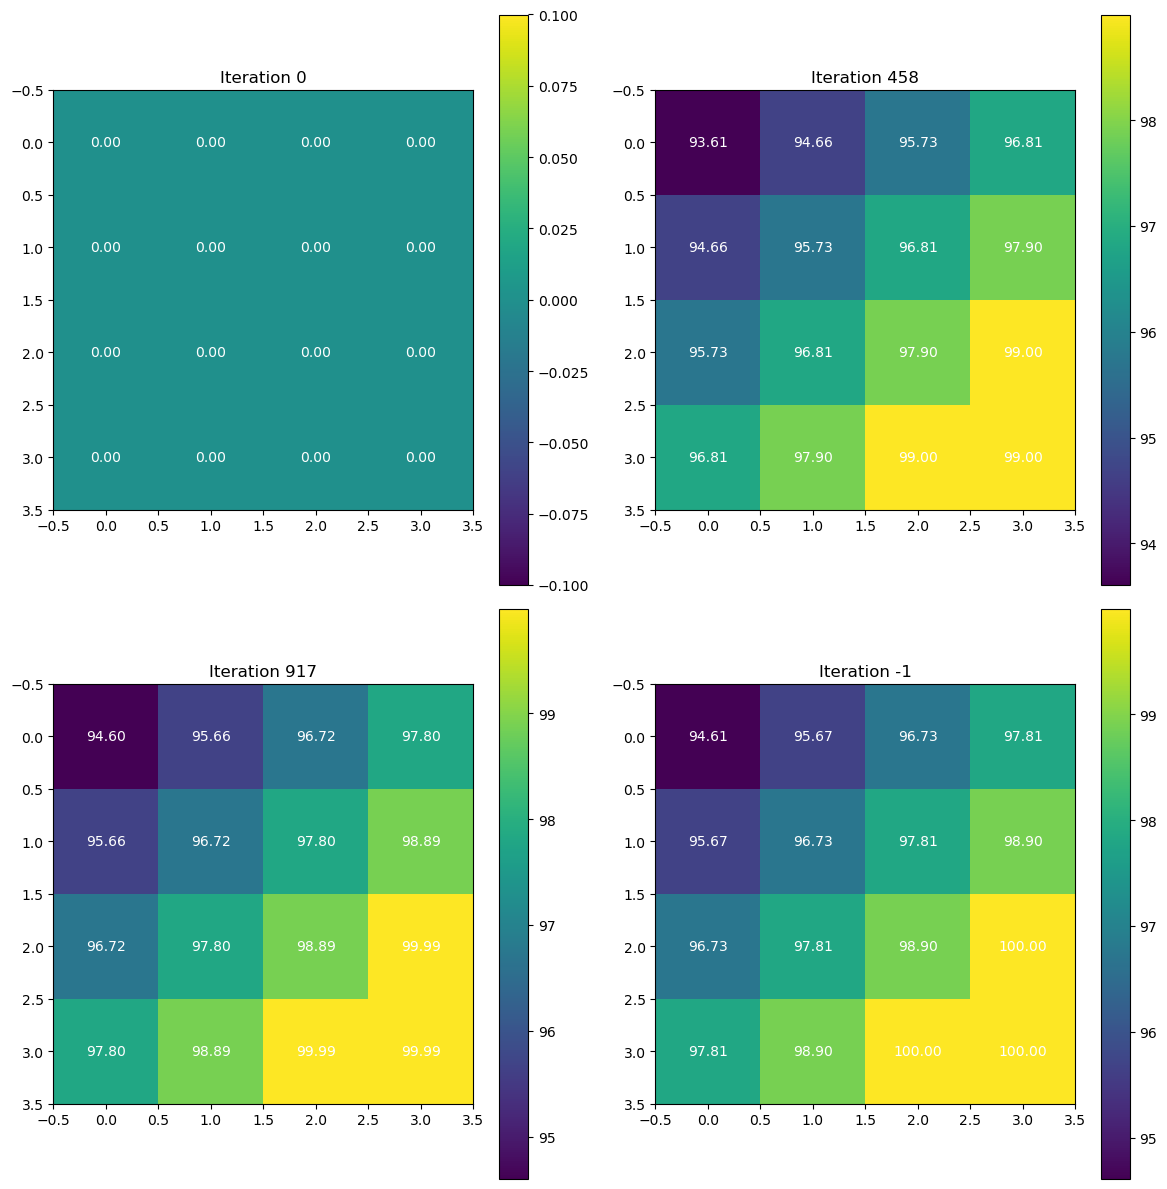

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple

class SimpleGridWorld:
    """A simple 4x4 grid world to demonstrate Bellman equation."""
    def __init__(self):
        self.grid_size = 4
        self.n_states = self.grid_size ** 2
        self.n_actions = 4  # up, right, down, left
        self.goal_state = self.n_states - 1  # bottom-right corner
        
        # Initialize transition probabilities and rewards
        self.P = self._create_transition_matrix()
        self.R = self._create_reward_matrix()
    
    def _create_transition_matrix(self) -> np.ndarray:
        """Create transition probability matrix P[s,a,s']."""
        P = np.zeros((self.n_states, self.n_actions, self.n_states))
        
        for s in range(self.n_states):
            row, col = s // self.grid_size, s % self.grid_size
            
            # For each action (up, right, down, left)
            for a in range(self.n_actions):
                next_row, next_col = row, col
                
                # Determine next state based on action
                if a == 0:  # up
                    next_row = max(0, row - 1)
                elif a == 1:  # right
                    next_col = min(self.grid_size - 1, col + 1)
                elif a == 2:  # down
                    next_row = min(self.grid_size - 1, row + 1)
                elif a == 3:  # left
                    next_col = max(0, col - 1)
                
                next_state = next_row * self.grid_size + next_col
                P[s, a, next_state] = 1.0
        
        return P
    
    def _create_reward_matrix(self) -> np.ndarray:
        """Create reward matrix R[s,a,s']."""
        R = np.full((self.n_states, self.n_actions, self.n_states), -0.1)  # Small negative reward for each step
        
        # Add positive reward for reaching the goal
        for s in range(self.n_states):
            for a in range(self.n_actions):
                if np.any(self.P[s, a] * (self.goal_state == np.arange(self.n_states))):
                    R[s, a] = np.where(self.goal_state == np.arange(self.n_states), 1.0, -0.1)
        
        return R

def demonstrate_bellman_optimality():
    """Demonstrate Bellman optimality equation through value iteration."""
    env = SimpleGridWorld()
    gamma = 0.99  # discount factor
    theta = 1e-6  # convergence threshold
    
    # Initialize value function
    V = np.zeros(env.n_states)
    
    # Initialize policy
    policy = np.zeros(env.n_states, dtype=int)
    
    iteration_history = []
    
    while True:
        delta = 0
        V_old = V.copy()
        iteration_history.append(V_old.copy())
        
        # Update each state
        for s in range(env.n_states):
            v = V[s]
            
            # Calculate Q-values for all actions
            Q_values = np.zeros(env.n_actions)
            for a in range(env.n_actions):
                for s_next in range(env.n_states):
                    # Bellman equation components:
                    # 1. P[s,a,s']: Transition probability
                    # 2. R[s,a,s']: Immediate reward
                    # 3. gamma * V[s']: Discounted future value
                    Q_values[a] += env.P[s, a, s_next] * (
                        env.R[s, a, s_next] + gamma * V_old[s_next]
                    )
            
            # Update value function with maximum Q-value
            V[s] = np.max(Q_values)
            # Update policy
            policy[s] = np.argmax(Q_values)
            
            # Track maximum change
            delta = max(delta, abs(v - V[s]))
        
        # Check convergence
        if delta < theta:
            break
    
    return V, policy, iteration_history

def visualize_value_iteration(iteration_history: List[np.ndarray], grid_size: int):
    """Visualize how values evolve during value iteration."""
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    iterations_to_show = [0, len(iteration_history)//3, 2*len(iteration_history)//3, -1]
    
    for idx, iter_idx in enumerate(iterations_to_show):
        ax = axes[idx//2, idx%2]
        values = iteration_history[iter_idx].reshape(grid_size, grid_size)
        
        im = ax.imshow(values, cmap='viridis')
        plt.colorbar(im, ax=ax)
        
        # Add value annotations
        for i in range(grid_size):
            for j in range(grid_size):
                text = ax.text(j, i, f'{values[i, j]:.2f}',
                             ha="center", va="center", color="w")
        
        ax.set_title(f'Iteration {iter_idx}')
    
    plt.tight_layout()
    return plt

# Run demonstration
if __name__ == "__main__":
    # Demonstrate Bellman optimality equation
    optimal_values, optimal_policy, history = demonstrate_bellman_optimality()
    
    print("\nOptimal Values:")
    print(optimal_values.reshape(4, 4))
    
    print("\nOptimal Policy:")
    policy_symbols = ['↑', '→', '↓', '←']
    policy_grid = [[policy_symbols[optimal_policy[r * 4 + c]] 
                   for c in range(4)] for r in range(4)]
    for row in policy_grid:
        print(' '.join(row))
    
    # Create visualization
    plt = visualize_value_iteration(history, 4)
    plt.show()

Position of helicopter $\rightarrow$ how to move control sticks

The position and orientation and speed and so on *the state* of the helicopter.

an and the task is to find function that maps from the state of the helicopter to the action that should be taken.

We can use supervised learning to solve this problem, but this is not the best way to solve it. In actually not exists the right action to take. It's actually very difficult to get a data set of $x$ and the ideal action $y$.

Reinforcement learning use the mechanism of reward to solve this problem.
The reward is a measure of how good the action was.

One of the powerful of reinforcement learning is that *you can tell it what to do* rather than *how to do it* specifying the reward function. This add more flexibility to system.

Applications

* Control of robots
* Factory optimization:  how do you arrange things in the fatory to maximize throughput?
* Stock trading
* Playing video games

Formalism

- *state* (s)
- *terminal state*
- *action* (a)
- *reward* (R(s)) if its damage the reward can be negative
- *next state* (s')

$$(s, a, R(s), s')$$

Return is the sum of discounted future rewards from the current state to target state.

$$\text{Return}(s° \rightarrow s^{n}) = R(s°) + \gamma^{1} R(s^{1}) + ... +  \gamma^{n} R(s^n)$$

A policy is a function $\pi(s)=a$ that maps from state to action. And we want to find is **a policy that maximizes the expected return**.

Q(s,a) function is a function that maps from state and action to return.

This return is the sum of discounted future rewards from the current state + action taken + optimal target state.

$$R(s) + \gamma R(s^1) + \gamma^2 R(s^2) + ... + \gamma^n R(s^n)$$

Here $R(s)$ is the reward of state $s$, and $\gamma$ is the discount factor. $R(s^1)$ is the reward of state $s^1$ after taking action $a$, and from $R(s^2)$ to $R(s^n)$ is the policy that maximizes the expected return.

The best possible *return* and the best *action* from the state $s$ is $\max_{a} Q(s,a)$

$Q(s,a) = $ Return if you
- start in state $s$
- take the action $a$
- then behave optimally ater that.

$Q$ function is called Optional $Q^{*}$ function as well

Bellman ecuation

$Q (s,a) = R(s,a) + \gamma \max_{a'} Q(s',a')$

Bellman ecuation with random stochastic environment

$Q (s,a) = R(s,a) + \gamma E[\max_{a'} Q(s',a')]$

Discrete State Space: The space is discrete.

Continuous State Space: The space is continuous. and in real world the dimension of the state is $\mathbb{R}^{n}$.

For example: a car has $3$ states related to movement, but i has $3$ states related to acceleration.

$$\begin{bmatrix}
x\\
y \\
\theta \\
\dot{x} \\
\dot{y} \\
\dot{\theta} 
\end{bmatrix}$$

Luna lander

actions:
* do nothing
* left thruster
* right thruster
* main thruster

$$\begin{bmatrix}
x\\
y \\
\theta \\
\dot{x} \\
\dot{y} \\
\dot{\theta} \\
l\\
r
\end{bmatrix}$$


$x$ how far to left or right

$y$ how far to up or down

$\dot{x}$ velocity how fast moving in the horizontal direction

$\dot{y}$ velocity how fast moving in the vertical direction

$\theta$ is the lunar lander *tilted* to the left or right

$\dot{\theta}$ is the angular velocity

$l$: $1$ if the left leg is sitting on the ground otherwise $0$

$r$: $1$ if the right leg is sitting on the ground otherwise $0$

Reward Function

* Getting to landing pad: $100-140$
* Additional reward for moving toward/way form pad
* crash: $-100$
* soft landing: $+100$
* leg grounded: $+10$
* fire main engine: $-0.3$
* fire side thrusters: $-0.03$

Last two penalties the using of the left and right thrusters.

Lunar Lander Problem

Learn a policy that maximizes the expected return, given 

$$s = \begin{bmatrix}
x\\
y \\
\theta \\
\dot{x} \\
\dot{y} \\
\dot{\theta} \\
l\\
r
\end{bmatrix}$$

pick action $a = \pi(s)$ so as to maximize the return

$\gamma = 0.985$

## Deep Reinforcement Learning

Input: $x = [s^{T}, a_{\text{one hot}}]$

The accion $a$ is one hot encoded.

sample: $[x, y, \theta, \dot{x}, \dot{y}, \dot{\theta}, l, r, 1, 0, 0,0]$


Output: $Q(s, a)=y$

<div style="text-align: center;">
<img src="Screenshot 2024-07-11 194604.png" width="600px">
</div>

In the state $s$, use neural network to compute

$Q(s, \text{nothing})$, $Q(s, \text{left})$, $Q(s, \text{main})$, $Q(s, \text{right})$

Pick the action $a$ that maximizes $Q(s, a)$

[Deep Q-Learning](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf)


Learning Algorithm

Intitialize NN randonmly as guess of $Q(s, a)$

Repeat {
    Take actions in the lunar lander. Get $(s,a, R(s), s')$
    Store 10, 00 most recent $(s,a, R(s), s')$ tuples.
    Train NN:
Create training set of 10,000 examples using $x=(s, a)$ and $y = R(s) + \gamma \max_{a'} Q(s',a')$ 
Train $Q_{\text{New}}$ such that $Q_{\text{New}}(s,a) = y$
    Set $Q = Q_{\text{New}}$
}

In [31]:
from collections import deque

ss = deque(maxlen=5)

In [32]:
ss.append((5))

In [34]:
ss.append((9, 5, 6))

In [35]:
ss

deque([5, (9, 5, 6)], maxlen=5)

In [ ]:
ss

Improvement in efficiency.

<div style="text-align: center;">
<img src="Screenshot 2024-07-11 201234.png" width="400px">
</div>

In the state $s$, input $s$ to NN. Pick the action $a$ that maximizes $Q(s, a)$

The Bellman equation is compute mroe effiecient

How  to choose actions while still learning?

In some state $s$:

* Option 1: Pick the action $a$ that maximizes $Q(s, a)$
* Option 2 [$\epsilon$ -greedy policy]: 
  - With the probability $1 - \epsilon$ pick the action $a$ that maximizes $Q(s, a)$. *Greedy*, or *Exploitation*.
  - With the probability $\epsilon=\%5$ pick a random action. *Exploration*


It guarantees that the policy will not be stuck in a local minimal, or local optima. It guarantees that the policy not biases that action to some actions with low penalty.

Strategy: $\epsilon$ high for starting and $\epsilon$ low for ending

The fine-tuning in reforcement learning is hard to do. And the effect of wrong parameter tunning increase the time x10 to convergence.